In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications

%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:

import time # calculate time 
from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
phish_data = pd.read_csv('phishing_site_urls.csv')
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [3]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [4]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

In [6]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

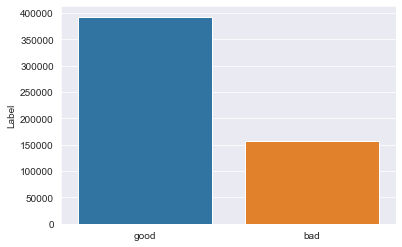

In [7]:
#visualizing target_coloumn
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [8]:
#--------------------------------------------------Preprocessing------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------

In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [10]:
phish_data.URL[12]

'www.coincoele.com.br/Scripts/smiles/?pt-br/Paginas/default.aspx'

In [11]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[12]) 

['www',
 'coincoele',
 'com',
 'br',
 'Scripts',
 'smiles',
 'pt',
 'br',
 'Paginas',
 'default',
 'aspx']

In [12]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.6108138000000025 sec


In [13]:
phish_data.sample(7)


,URL,Label,text_tokenized
547876,me.3342.mobi/7/?9643522803,bad,"[me, mobi]"
24059,bussiness.38370.kingdream.kz/login-error.php?l...,bad,"[bussiness, kingdream, kz, login, error, php, ..."
343792,gadgetfolder.com/onkyo-ds7a-a25-slim-desktop-j...,good,"[gadgetfolder, com, onkyo, ds, a, a, slim, des..."
360547,imdb.com/title/tt0491738/epcast,good,"[imdb, com, title, tt, epcast]"
23049,www.standprincipal.pt/site/modules/mod_login/c...,bad,"[www, standprincipal, pt, site, modules, mod, ..."
258665,wiki.answers.com/Q/What_are_major_social_and_p...,good,"[wiki, answers, com, Q, What, are, major, soci..."
387436,merriam-webster.com/dictionary/topsy-turvy,good,"[merriam, webster, com, dictionary, topsy, turvy]"


In [14]:
print('Getting raw words ...')
t0= time.perf_counter()
phish_data['text_raw'] = phish_data['text_tokenized'].map(lambda text: ' '.join(text))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting raw words ...
Time taken 0.2576781000000068 sec


In [15]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_raw
105118,aor.gr/components/com_users/models/sc/newp/ind...,bad,"[aor, gr, components, com, users, models, sc, ...",aor gr components com users models sc newp ind...
109532,demo.xcally.com/assets/plugins/jquery-file-upl...,bad,"[demo, xcally, com, assets, plugins, jquery, f...",demo xcally com assets plugins jquery file upl...
402791,nebsports.com/2009/03/03/major-culbert-no-long...,good,"[nebsports, com, major, culbert, no, longer, w...",nebsports com major culbert no longer with the...
284095,artscenecal.com/Announcements/0705/L2kontempor...,good,"[artscenecal, com, Announcements, L, kontempor...",artscenecal com Announcements L kontemporary html
275362,amazon.com/Hank-Williams-Sr-Show-Never/dp/6302...,good,"[amazon, com, Hank, Williams, Sr, Show, Never,...",amazon com Hank Williams Sr Show Never dp X


In [16]:
phish_data.sample(7)

,URL,Label,text_tokenized,text_raw
248299,todfennell.com/,good,"[todfennell, com]",todfennell com
394945,myapartmentparis.com/rent/saint-martin-market/...,good,"[myapartmentparis, com, rent, saint, martin, m...",myapartmentparis com rent saint martin market ...
388519,metrolyrics.com/raphael-saadiq-lyrics.html,good,"[metrolyrics, com, raphael, saadiq, lyrics, html]",metrolyrics com raphael saadiq lyrics html
358844,imdb.com/name/nm0584335/bio,good,"[imdb, com, name, nm, bio]",imdb com name nm bio
533606,illaghettodelcircoletto.it/flkekqs,bad,"[illaghettodelcircoletto, it, flkekqs]",illaghettodelcircoletto it flkekqs
379386,lookupanyone.com/namelistings/gus-hanrahan.html,good,"[lookupanyone, com, namelistings, gus, hanraha...",lookupanyone com namelistings gus hanrahan html
514549,errorfola.top/read.php?f=0.dat,bad,"[errorfola, top, read, php, f, dat]",errorfola top read php f dat


In [17]:
#------------------------------------------------------Visualization-------------------------------------------------------

In [18]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [19]:
bad_sites.head()

,URL,Label,text_tokenized,text_raw
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...",nobell it ffb d dca cce f login SkyPe com en c...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...",serviciosbys com paypal cgi bin get into herf ...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...",mail printakid com www online americanexpress ...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...",thewhiskeydregs com wp content themes widescre...


In [20]:
good_sites.head()

,URL,Label,text_tokenized,text_raw
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...",esxcc com js index htm us battle net noghn en ...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...",www eira nvinip ncH wV yDaH yE u rT u g m i XZ...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij R ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]",Y ko D l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...",ruta fm com images AS Vies i cf b vc F d b g s...


In [21]:
# Visualize internal links, it will shows all redirect links.

In [22]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.binary_location = "C:\\Program Files\\BraveSoftware\\Brave-Browser\\Application\\brave.exe"
driver_path = "C:\\Users\\bbirj\\Desktop\\INTELLIGENCE-X\\chromedriver.exe"
drvr = webdriver.Chrome(options = options, executable_path = driver_path)

In [23]:
list_urls = ['https://www.facebook.com/'] #here i take good site 
links_with_text = []

In [24]:
for url in list_urls:
    drvr.get(url)
    soup = BeautifulSoup(drvr.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

In [25]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [26]:
df.tail()

,from,to
41,https://www.facebook.com/,/policies?ref=pf
42,https://www.facebook.com/,/help/?ref=pf
43,https://www.facebook.com/,help/637205020878504
44,https://www.facebook.com/,/settings
45,https://www.facebook.com/,/allactivity?privacy_source=activity_log_top_menu


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   from    46 non-null     object
 1   to      46 non-null     object
dtypes: object(2)
memory usage: 864.0+ bytes


In [ ]:
## Here I demonstrate(using selenium webdriver) how hackers can redirect you from one website to another.

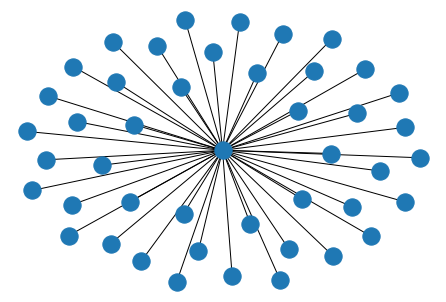

In [28]:
GA = networkx.from_pandas_edgelist(df, source="from", target="to")
networkx.draw(GA, with_labels=False)

In [29]:
##CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [30]:
#create cv object
cv = CountVectorizer()

In [31]:
feature = cv.fit_transform(phish_data.text_raw) #transform all text which we tokenized

In [ ]:
# --------------------------------------------Model Training----------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------------

In [50]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [33]:
# create lr object
lr = LogisticRegression()

In [34]:
##implementing Logistic regression for train the data
lr.fit(trainX,trainY)

LogisticRegression()

In [35]:
#calculting test score
lr.score(testX,testY)

0.9644305613199647

In [36]:
#calculating train score
lr.score(trainX,trainY)

0.9789446347045817

Training Accuracy : 0.9789446347045817
Testing Accuracy : 0.9644305613199647

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36863
        Good       0.99      0.96      0.98    100474

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

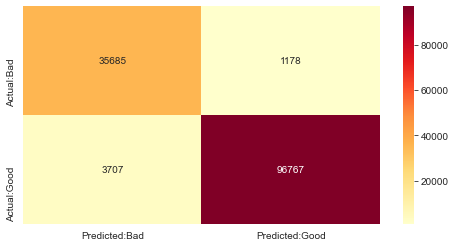

In [37]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlOrRd")

In [38]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression()) 

In [39]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [40]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [41]:
pipeline_ls.score(testX,testY) 

0.9674159185070301

In [42]:
pipeline_ls.score(trainX,trainY) 

0.9811217716117852

Training Accuracy : 0.9811217716117852
Testing Accuracy : 0.9674159185070301

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94     36831
        Good       0.99      0.97      0.98    100506

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot:>

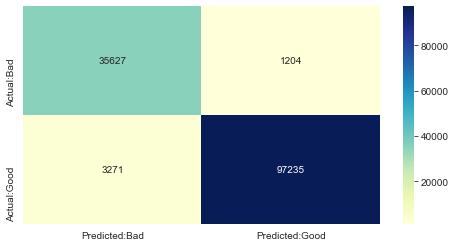

In [43]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
#-----------------------------------------------Prediction-----------------------------------------------------------------
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [44]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [45]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9674159185070301


In [49]:
URLs_input1 = ['www.google.com','anonymeidentity.net/remax./remax.htm','https://ultrabank.com','www.facebook.com']
URLs_input2 = ['www.controlledprojects.info/security/','https://www.facebook.com','https://www.youtube.com/']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result1 = loaded_model.predict(URLs_input1)
result2 = loaded_model.predict(URLs_input2)
print(result1)
print("*"*20)
print(result2)

['good' 'bad' 'bad' 'good']
********************
['bad' 'good' 'good']


In [ ]:
#                                                 Arigato!!